In [1]:
import numpy
import keras
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import  LSTM as LSTM, SimpleRNN, GRU as GRU
#from keras.layers import LSTM , SimpleRNN, GRU
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
# fix random seed for reproducibility
numpy.random.seed(7)

Using TensorFlow backend.


In [2]:
import pandas as pd
data = pd.read_csv("smsspamcollection/SMSSpamCollection.txt", header = None, sep="\t")

In [3]:
data.head()

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
data.columns = ['label','text']

In [5]:
data['y']=0

In [6]:
data.loc[data['label']=='spam','y']=1

In [7]:
data['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [8]:
import collections
def build_dataset(words):
    count = collections.Counter(words).most_common()
    dictionary = dict()
    for word, _ in count:
        dictionary[word] = len(dictionary)
    reverse_dictionary = dict(zip(dictionary.values(), dictionary.keys()))
    return dictionary, reverse_dictionary

In [9]:
word_list=[]
for i in data['text']:
    word_list = word_list + i.split()

In [10]:
print(word_list[:20])

['Go', 'until', 'jurong', 'point,', 'crazy..', 'Available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet...', 'Cine', 'there', 'got', 'amore', 'wat...']


In [11]:
enc, dec = build_dataset(word_list)

In [12]:
for i in enc:
    enc[i] = enc[i]+2
    
enc['pad']=0
enc['<start>']=1
dec[-2]='<pad>'
dec[-1]='<start>'

In [13]:
import numpy as np
n=int(np.floor(data.shape[0]*0.75))
train = data[0:n]
test = data[n:]

In [14]:
x_train=[]
y_train=[]
for i in range(train.shape[0]):
    tmp = [enc[j] for j in train.iloc[i,1].split()]
    x_train.append(tmp)
    if train.iloc[i,0]=='spam':
        y=1
    else:
        y=0
    y_train.append(y)
    
x_test=[]
y_test=[]
for i in range(test.shape[0]):
    tmp = [enc[j] for j in test.iloc[i,1].split()]
    x_test.append(tmp)
    if test.iloc[i,0]=='spam':
        y=1
    else:
        y=0
    y_test.append(y)



In [15]:
print([dec[i-2] for i in x_train[0]])

['Go', 'until', 'jurong', 'point,', 'crazy..', 'Available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet...', 'Cine', 'there', 'got', 'amore', 'wat...']


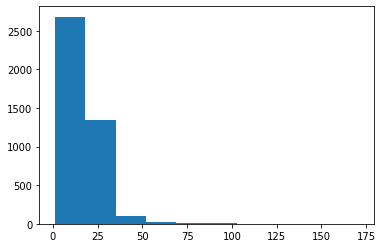

In [16]:
import matplotlib.pyplot as plt
plt.hist([len(i) for i in x_train])
plt.show()

In [17]:
len(enc)

15693

In [18]:
max_length = 50
x_train = sequence.pad_sequences(x_train, maxlen=max_length)
x_test = sequence.pad_sequences(x_test, maxlen=max_length)

In [19]:
type(y_train)

list

In [20]:
embedding_vecor_length = 80
model1 = Sequential()
model1.add(Embedding(15693, embedding_vecor_length, input_length=max_length))
model1.add(SimpleRNN(100,unroll=True))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model1.summary())
model1.fit(x_train, np.array(y_train), validation_data=(x_test, np.array(y_test)), epochs=3, batch_size=64)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 80)            1255440   
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 100)               18100     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 1,273,641
Trainable params: 1,273,641
Non-trainable params: 0
_________________________________________________________________
None
Train on 4179 samples, validate on 1393 samples
Epoch 1/3
4179/4179 [==============================] - 7s 2ms/sample - loss: 0.3777 - accuracy: 0.8634 - val_loss: 0.3410 - val_accuracy: 0.8693
Epoch 2/3
4179/4179 [==============================] - 2s 479us/sample - loss: 0.1060 - accuracy: 0.9689 - val_loss: 0.0629 - val_accuracy: 0.9828
Epoch 3/3
4179/4179 [==========

In [22]:
from tensorflow.keras.layers import Bidirectional, TimeDistributed
embedding_vecor_length = 100
model5 = Sequential()
model5.add(Embedding(15693, embedding_vecor_length, input_length=max_length))
model5.add((Bidirectional(SimpleRNN(100,return_sequences=False, dropout=0.5))))
model5.add(Dense(1, activation='sigmoid'))
model5.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model5.summary())
model5.fit(x_train, np.array(y_train), validation_data=(x_test, np.array(y_test)), epochs=3, batch_size=64)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 50, 100)           1569300   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200)               40200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 201       
Total params: 1,609,701
Trainable params: 1,609,701
Non-trainable params: 0
_________________________________________________________________
None
Train on 4179 samples, validate on 1393 samples
Epoch 1/3
4179/4179 [==============================] - 9s 2ms/sample - loss: 0.3144 - accuracy: 0.8741 - val_loss: 0.1762 - val_accuracy: 0.9462
Epoch 2/3
4179/4179 [==============================] - 6s 1ms/sample - loss: 0.1294 - accuracy: 0.9596 - val_loss: 0.1748 - val_accuracy: 0.9555
Epoch 3/3
4179/4179 [==========

In [24]:
embedding_vecor_length = 100
model5 = Sequential()
model5.add(Embedding(15693, embedding_vecor_length, input_length=max_length))
model5.add(LSTM(100,return_sequences=False, dropout=0.5))
model5.add(Dense(1, activation='sigmoid'))
model5.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model5.summary())
model5.fit(x_train, np.array(y_train), validation_data=(x_test, np.array(y_test)), epochs=3, batch_size=64)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 50, 100)           1569300   
_________________________________________________________________
lstm (LSTM)                  (None, 100)               80400     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 1,649,801
Trainable params: 1,649,801
Non-trainable params: 0
_________________________________________________________________
None
Train on 4179 samples, validate on 1393 samples
Epoch 1/3
4179/4179 [==============================] - 7s 2ms/sample - loss: 0.3030 - accuracy: 0.8997 - val_loss: 0.1036 - val_accuracy: 0.9727
Epoch 2/3
4179/4179 [==============================] - 2s 428us/sample - loss: 0.0622 - accuracy: 0.9828 - val_loss: 0.0575 - val_accuracy: 0.9864
Epoch 3/3
4179/4179 [========

In [25]:
embedding_vecor_length = 100
model5 = Sequential()
model5.add(Embedding(15693, embedding_vecor_length, input_length=max_length))
model5.add(GRU(100,return_sequences=False, dropout=0.5))
model5.add(Dense(1, activation='sigmoid'))
model5.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model5.summary())
model5.fit(x_train, np.array(y_train), validation_data=(x_test, np.array(y_test)), epochs=3, batch_size=64)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 50, 100)           1569300   
_________________________________________________________________
gru (GRU)                    (None, 100)               60600     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 1,630,001
Trainable params: 1,630,001
Non-trainable params: 0
_________________________________________________________________
None
Train on 4179 samples, validate on 1393 samples
Epoch 1/3
4179/4179 [==============================] - 6s 1ms/sample - loss: 0.3114 - accuracy: 0.8844 - val_loss: 0.1003 - val_accuracy: 0.9698
Epoch 2/3
4179/4179 [==============================] - 2s 439us/sample - loss: 0.0498 - accuracy: 0.9868 - val_loss: 0.0508 - val_accuracy: 0.9821
Epoch 3/3
4179/4179 [========